In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df['Skin']=df['SkinThickness']

In [6]:
df['Diabetes_degree']=df['DiabetesPedigreeFunction']

In [7]:
df.drop(['SkinThickness', 'DiabetesPedigreeFunction'], axis=1, inplace=True)

In [8]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age,Outcome,Skin,Diabetes_degree
0,6,148,72,0,33.6,50,1,35,0.627
1,1,85,66,0,26.6,31,0,29,0.351
2,8,183,64,0,23.3,32,1,0,0.672
3,1,89,66,94,28.1,21,0,23,0.167
4,0,137,40,168,43.1,33,1,35,2.288


In [9]:
df.isnull().sum()

Pregnancies        0
Glucose            0
BloodPressure      0
Insulin            0
BMI                0
Age                0
Outcome            0
Skin               0
Diabetes_degree    0
dtype: int64

In [10]:
# visulization

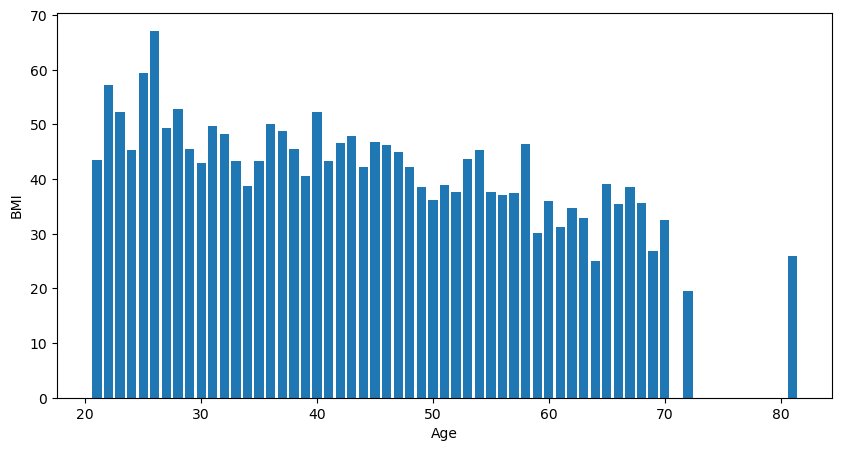

In [11]:
plt.figure(figsize=(10,5))
plt.bar(df['Age'],df['BMI'])
plt.xlabel("Age")
plt.ylabel('BMI')

plt.show()

In [12]:
df.corr()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age,Outcome,Skin,Diabetes_degree
Pregnancies,1.000000,0.129459,0.141282,-0.073535,0.017683,0.544341,0.221898,-0.081672,-0.033523
Glucose,0.129459,1.000000,0.152590,0.331357,0.221071,0.263514,0.466581,0.057328,0.137337
BloodPressure,0.141282,0.152590,1.000000,0.088933,0.281805,0.239528,0.065068,0.207371,0.041265
Insulin,-0.073535,0.331357,0.088933,1.000000,0.197859,-0.042163,0.130548,0.436783,0.185071
BMI,0.017683,0.221071,0.281805,0.197859,1.000000,0.036242,0.292695,0.392573,0.140647
Age,0.544341,0.263514,0.239528,-0.042163,0.036242,1.000000,0.238356,-0.113970,0.033561
Outcome,0.221898,0.466581,0.065068,0.130548,0.292695,0.238356,1.000000,0.074752,0.173844
Skin,-0.081672,0.057328,0.207371,0.436783,0.392573,-0.113970,0.074752,1.000000,0.183928
Diabetes_degree,-0.033523,0.137337,0.041265,0.185071,0.140647,0.033561,0.173844,0.183928,1.000000


<Axes: >

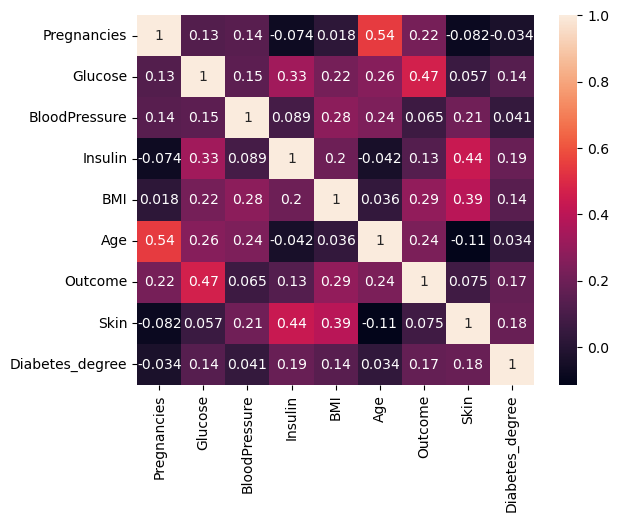

In [13]:
sns.heatmap(df.corr(), annot=True)

In [14]:
df.size

6912

In [15]:
df.shape

(768, 9)

In [16]:
df.drop(['Skin', 'Diabetes_degree'], axis=1, inplace=True)

<Axes: >

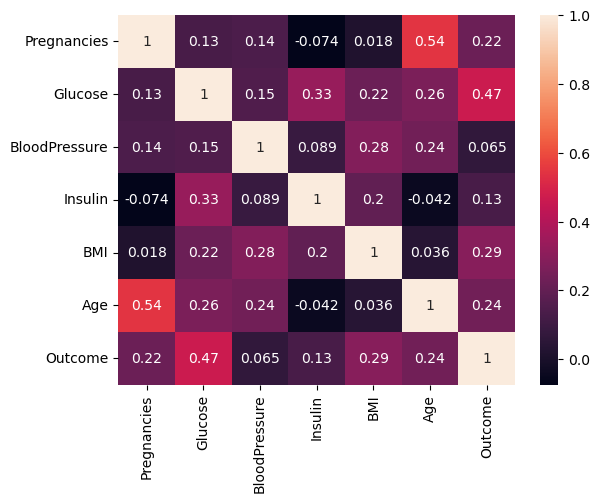

In [17]:
sns.heatmap(df.corr(), annot=True)

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,6,148,72,0,33.6,50,1
1,1,85,66,0,26.6,31,0
2,8,183,64,0,23.3,32,1
3,1,89,66,94,28.1,21,0
4,0,137,40,168,43.1,33,1


In [19]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age',
       'Outcome'],
      dtype='object')

In [20]:
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age']]

In [21]:
y=df['Outcome']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
lr=LogisticRegression()

In [25]:
lr.fit(X_train,y_train)

LogisticRegression()

In [26]:
from sklearn.metrics import classification_report, accuracy_score

In [27]:
y_pred=lr.predict(X_test)

In [28]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [29]:
cls=print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78        98
           1       0.62      0.61      0.61        56

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [30]:
predict_dataset={'actual':y_test, 'predit_data':y_pred}

In [31]:
result=pd.DataFrame(predict_dataset)

In [32]:
result

,actual,predit_data
668,0,0
324,0,0
624,0,0
690,0,0
473,0,1
...,...,...
355,1,1
534,0,0
344,0,0
296,1,0


In [33]:
lr.predict([[6,148,72,0,33.6,50]])

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [34]:
def model_dev(model):
    X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)
    model.fit(X_train,y_train)
    model.predict(X_test)
    score=accuracy_score(y_pred,y_test)
    return score
    
    


In [35]:
lr1=LogisticRegression()

In [36]:
model_dev(lr1)

0.7207792207792207

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [38]:
rf=RandomForestClassifier()

In [39]:
dt=DecisionTreeClassifier()

In [40]:
model_dev(rf)

0.7207792207792207

In [41]:
model_dev(dt)

0.7207792207792207

In [46]:
import pickle
import joblib

In [47]:
joblib.dump(lr, 'lr.pkl')

['lr.pkl']